In [4]:
!pip install faker


  Obtaining dependency information for faker from https://files.pythonhosted.org/packages/eb/02/72c93c1df2eff2502bfb94d6c3937192c1090c8095c389bc24533a55d327/Faker-36.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 435.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.9 MB 939.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.3/1.9 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/1.9 MB 3.1 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.9 MB 3.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/1.9 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/1.9 MB 4.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/1.9 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from faker import Faker

# Initializing Faker
fake = Faker()

# let set number of users to 1000
num_users = 1000

# Generate dataset
data = {
    "User_ID": list(range(1, num_users + 1)),
    "Viewing_Hours": np.random.randint(1, 100, size=num_users),
    "Genre_Preferences": [np.random.choice(["Action", "Drama", "Comedy", "Sci-Fi", "Horror"], 3, replace=False).tolist() for _ in range(num_users)],
    "Subscription_Status": np.random.choice(["Active", "Churned"], size=num_users, p=[0.8, 0.2]),
    "Churn_Probability": np.random.uniform(0, 1, size=num_users)
}

df = pd.DataFrame(data)
df.to_csv("star_bright_users.csv", index=False)

print("Dataset generated successfully!")


Dataset generated successfully!


In [50]:
df.head() # printintg 1st 5 rows of dataset


,User_ID,Viewing_Hours,Genre_Preferences,Subscription_Status,Churn_Probability
0,1,87,"[Horror, Comedy, Sci-Fi]",Active,0.621796
1,2,17,"[Drama, Horror, Sci-Fi]",Active,0.475023
2,3,34,"[Drama, Comedy, Sci-Fi]",Active,0.983989
3,4,2,"[Comedy, Horror, Action]",Active,0.530133
4,5,43,"[Sci-Fi, Comedy, Action]",Active,0.194636


In [53]:
df.describe() # statistics

,User_ID,Viewing_Hours,Churn_Probability
count,1000.000000,1000.000000,1000.000000
mean,500.500000,49.519000,0.496790
std,288.819436,29.079843,0.287049
min,1.000000,1.000000,0.001117
25%,250.750000,25.000000,0.245349
50%,500.500000,48.000000,0.489449
75%,750.250000,75.000000,0.746037
max,1000.000000,99.000000,0.998276


In [9]:
df.isnull() # missing values

,User_ID,Viewing_Hours,Genre_Preferences,Subscription_Status,Churn_Probability
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [10]:
missing_percentage=(df.isnull().sum()/len(df))*100 # percentage of missing values
missing_percentage 

User_ID                0.0
Viewing_Hours          0.0
Genre_Preferences      0.0
Subscription_Status    0.0
Churn_Probability      0.0
dtype: float64

In [11]:
avg_hours = df["Viewing_Hours"].mean()
print(f"Average Viewing Hours: {avg_hours:.2f}") 


Average Viewing Hours: 49.32


In [12]:
print(df.describe())
print(df["Subscription_Status"].value_counts())

           User_ID  Viewing_Hours  Churn_Probability
count  1000.000000    1000.000000        1000.000000
mean    500.500000      49.321000           0.494016
std     288.819436      29.134666           0.292491
min       1.000000       1.000000           0.000678
25%     250.750000      23.750000           0.223848
50%     500.500000      48.000000           0.485808
75%     750.250000      74.000000           0.754384
max    1000.000000      99.000000           0.999602
Subscription_Status
Active     821
Churned    179
Name: count, dtype: int64


In [29]:
df_sorted = df.sort_values(by='Viewing_Hours', ascending=True)


least_viewing_users = df_sorted[['User_ID', 'Viewing_Hours', 'Genre_Preferences']]


print("Users with Least Viewing Hours and Their Genre Preferences:")
print(least_viewing_users.head(5)) 


Users with Least Viewing Hours and Their Genre Preferences:
     User_ID  Viewing_Hours         Genre_Preferences
713      714              1   [Horror, Comedy, Drama]
368      369              1   [Sci-Fi, Comedy, Drama]
430      431              1  [Horror, Comedy, Sci-Fi]
407      408              1  [Sci-Fi, Comedy, Horror]
272      273              1   [Drama, Action, Comedy]


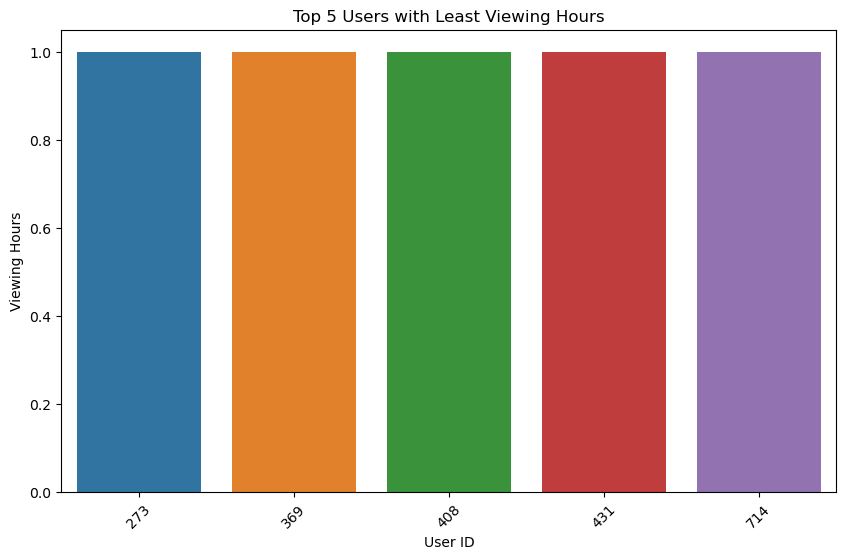

In [34]:

# Bar Plot of Users with Least Viewing Hours
plt.figure(figsize=(10, 6))
sns.barplot(x='User_ID', y='Viewing_Hours', data=least_viewing_users.head(5))  # Display the top 5 users with least viewing hours
plt.title('Top 5 Users with Least Viewing Hours')
plt.xlabel('User ID')
plt.ylabel('Viewing Hours')
plt.xticks(rotation=45)
plt.show()


C:\Users\sadan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


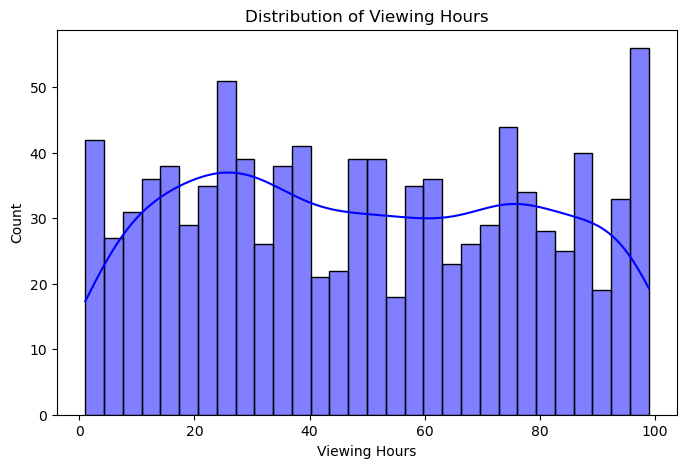

In [20]:
# Distribution of Viewing Hours
plt.figure(figsize=(8, 5))
sns.histplot(df["Viewing_Hours"], bins=30, kde=True, color="blue")
plt.title("Distribution of Viewing Hours")
plt.xlabel("Viewing Hours")
plt.ylabel("Count")
plt.show()

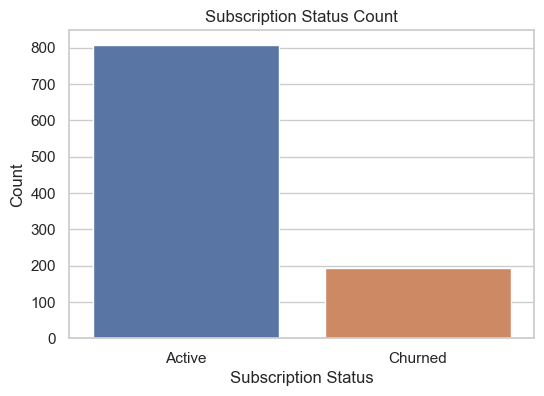

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Subscription_Status"])
plt.title("Subscription Status Count")
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.show()


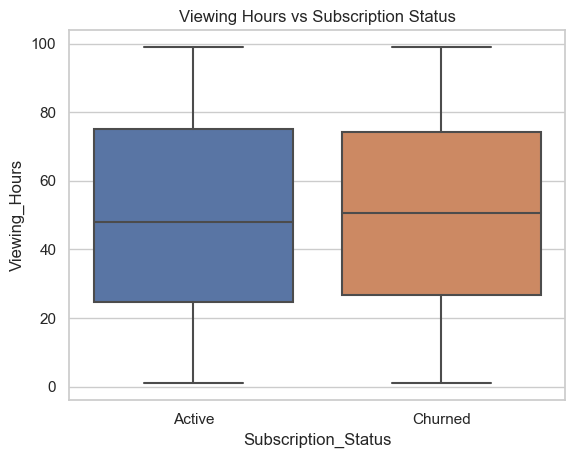

In [58]:
import matplotlib.pyplot as plt
sns.boxplot(x=df["Subscription_Status"], y=df["Viewing_Hours"])
plt.title("Viewing Hours vs Subscription Status")
plt.show()

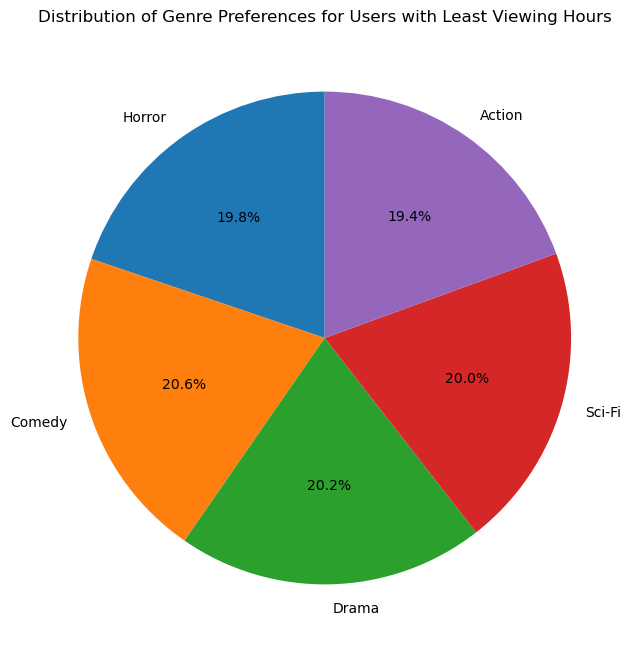

In [35]:
genre_counts = dict(genre_counts)  
plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genre Preferences for Users with Least Viewing Hours')
plt.show()


C:\Users\sadan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


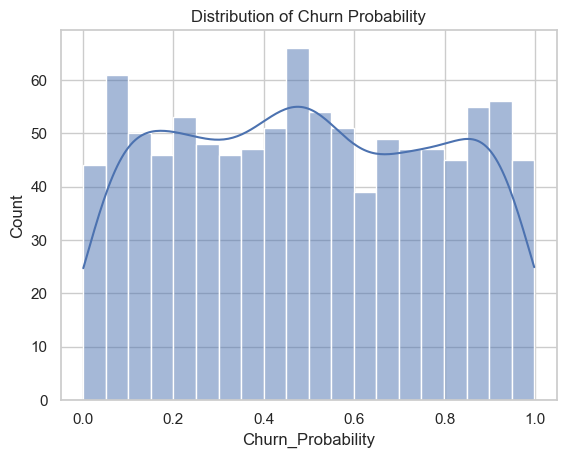

In [43]:
sns.set_theme(style="whitegrid")
sns.histplot(df["Churn_Probability"], bins=20, kde=True)
plt.title("Distribution of Churn Probability")
plt.show()



# Low-risk customers: churn probabilities below 0.2 (20%)

# Medium-risk customers: Large concentration between 0.4-0.6 (40-60%)

# High-risk customers:  customers with probabilities above 0.8 (80%)

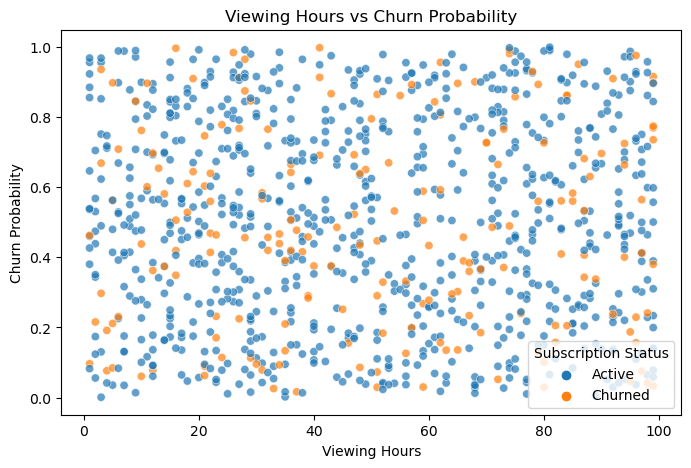

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Viewing_Hours"], y=df["Churn_Probability"], hue=df["Subscription_Status"], alpha=0.7)
plt.title("Viewing Hours vs Churn Probability")
plt.xlabel("Viewing Hours")
plt.ylabel("Churn Probability")
plt.legend(title="Subscription Status")
plt.show()

C:\Users\sadan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


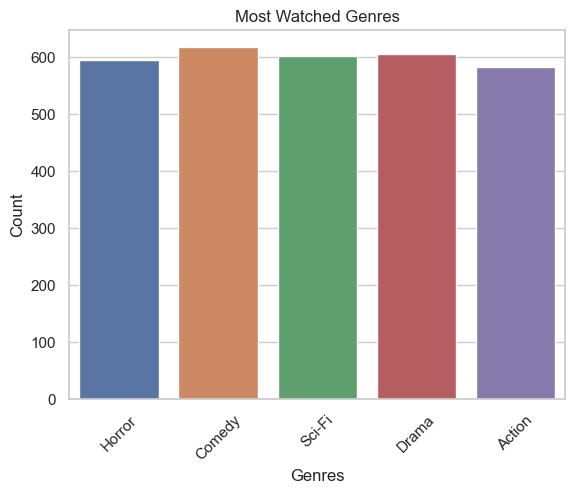

In [49]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten genre lists and count occurrences
all_genres = [genre for sublist in df["Genre_Preferences"] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot genre popularity
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title("Most Watched Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()


# Comedy and Drama are the most watched genres